In [1]:
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

from ann import *
import math
import numpy as np
import pandas as pd
from ggplot import *

# Implementacion

Importante: correr pip install -r requirements.txt ya que ggplot depende de una version mas vieja de pandas y matplotlib para python3.6

Implementamos la red neuronal usando el descenso por gradiente estocastico, siguiento el pseudocodig del libro de Teorico de Tom Mitchell.

En todos nuestras ejecucion usamos 10 u 11 neuronas y la funcion de activacion elegida es el sigmoide aunque soportamos tambien tanh.

Definimos ademas funciones para buscar el mejor alpha de aprendizaje para el set the datos y numero de iteraciones.

Mostramos y graficamos las funciones tanto en 2D para f(x) como en 3D para h(x,y) y g(x,y) asi como la evolucion del error en cada iteracion y la evolucion del error del gradiente calculado.

## f(x) = X^3 - X^2 + 1 
## Iteraciones: 10^2, 10^3, 10^4, 10^5

In [2]:
func = lambda x: x**3 - x**2 + 1
nin=1
nout=1

In [3]:
# Entreno las redes para cada iteracion y armo pandas con cada resultado
def generate_chart_data(func, best_alpha, points, activation=None):

    values2, error2, gcheck2 = predictions(10**2, best_alpha.get(2), func, points=points, activation=activation, gcheck=True)
    values2.rename(columns={'prediction': 'prediction_10^2'}, inplace=True)
    values3, error3, gcheck3 = predictions(10**3, best_alpha.get(3), func, points=points, activation=activation, gcheck=True)
    values3.rename(columns={'prediction': 'prediction_10^3'}, inplace=True)
    values4, error4, gcheck4 = predictions(10**4, best_alpha.get(4), func, points=points, activation=activation, gcheck=True)
    values4.rename(columns={'prediction': 'prediction_10^4'}, inplace=True)
    values5, error5, gcheck5 = predictions(10**5, best_alpha.get(5), func, points=points, activation=activation, gcheck=True)
    values5.rename(columns={'prediction': 'prediction_10^5'}, inplace=True)

    values = pd.merge(values2, values3, on=["x", "y"])
    values = pd.merge(values, values4, on=["x", "y"])
    values = pd.merge(values, values5, on=["x", "y"])
    
    errors = {
        'prediction_10^2': error2,
        'prediction_10^3': error3,
        'prediction_10^4': error4,
        'prediction_10^5': error5,
    }
    
    gcheck = {
        'prediction_10^2': gcheck2,
        'prediction_10^3': gcheck3,
        'prediction_10^4': gcheck4,
        'prediction_10^5': gcheck5,
    } 

    return (pd.melt(values, id_vars=["x"], value_vars=["y", "prediction_10^2", "prediction_10^3", "prediction_10^4", "prediction_10^5"]), errors, gcheck)

In [4]:
# dado un funcion #entredas y # de salidos, genero datos y uso una red de pruebas
# para calcular el mejor alpha de una lista predeterminadas de alphas para cada iteracion
def get_best_alpha(nin, nout, func, points):
    alphas=[1, 0.8, 0.5, 0.1, 0.05, 0.001]
    best_alpha = {}
    for i in range(2,6):
        test_ann = NeuralNetwork(nin=nin, nhidden=10, nout=1, activation=sigmoid)
        # training_points = generate_points(number=40, func=func, point_size=nin)
        #test_points = generate_points(number=40, func=func, point_size=1)
        result, _ = test_ann.best_alpha(points, points, 10**i, alphas)
        # print(f"Best alpha for 10^{i} is {result}")
        best_alpha[i] = result
    return best_alpha

### Obtengo el mejor alpha para cada iteracion

In [5]:

points = generate_points(number=40, func=func, point_size=nin)
best_alpha = get_best_alpha(nin=nin, nout=nout, func=func, points=points)
print(best_alpha)

{2: 1, 3: 1, 4: 0.8, 5: 0.8}


In [6]:
result, errors, gcheck = generate_chart_data(func, best_alpha, points, activation=sigmoid)

### Grafica de funciones obtenidas

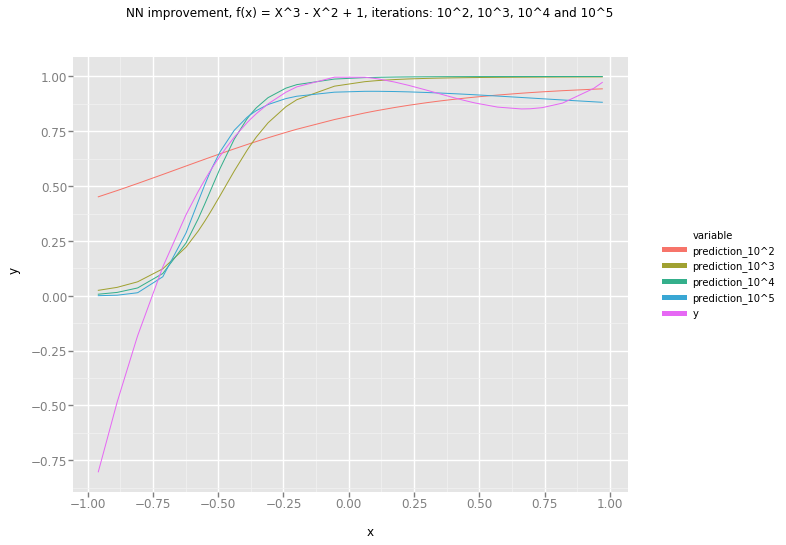

<ggplot: (306712931)>

In [7]:
%matplotlib inline
ggplot(result, aes(x='x', y='value', color='variable')) + \
    geom_line(size=1) + ylab("y") + ggtitle("NN improvement, f(x) = X^3 - X^2 + 1, iterations: 10^2, 10^3, 10^4 and 10^5")

### Errores por iteracion  y gradient check

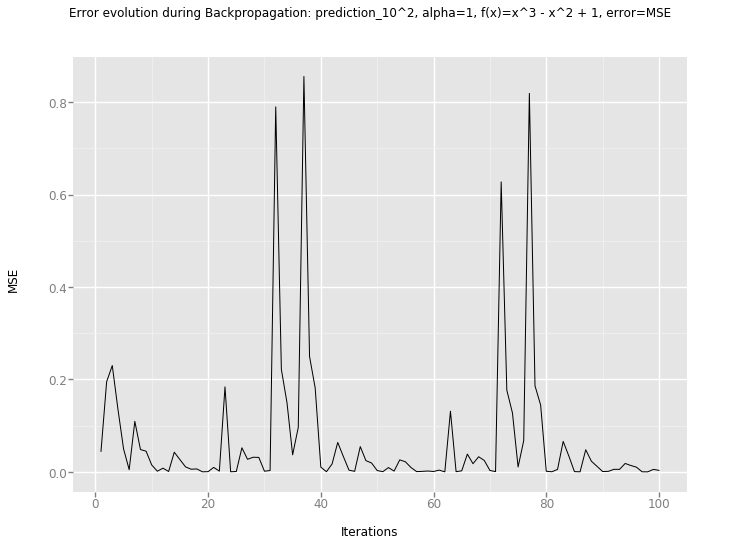

<ggplot: (-9223372036560209955)>

In [8]:
k = 'prediction_10^2'
%matplotlib inline
ggplot(errors[k], aes(x='Iterations', y='MSE')) + \
    geom_line(size=1) + ggtitle("Error evolution during Backpropagation: %s, alpha=%s, f(x)=x^3 - x^2 + 1, error=MSE" % (k, best_alpha.get(2)))

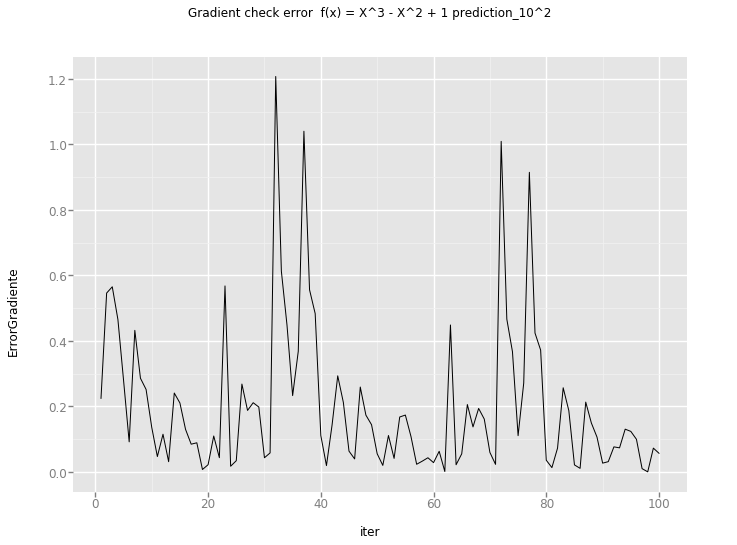

<ggplot: (294878286)>

In [9]:
%matplotlib inline
ggplot(gcheck[k], aes(x='iter', y='ErrorGradiente')) + \
    geom_line(size=1) + ylab("ErrorGradiente") + ggtitle("Gradient check error  f(x) = X^3 - X^2 + 1 %s" % k)

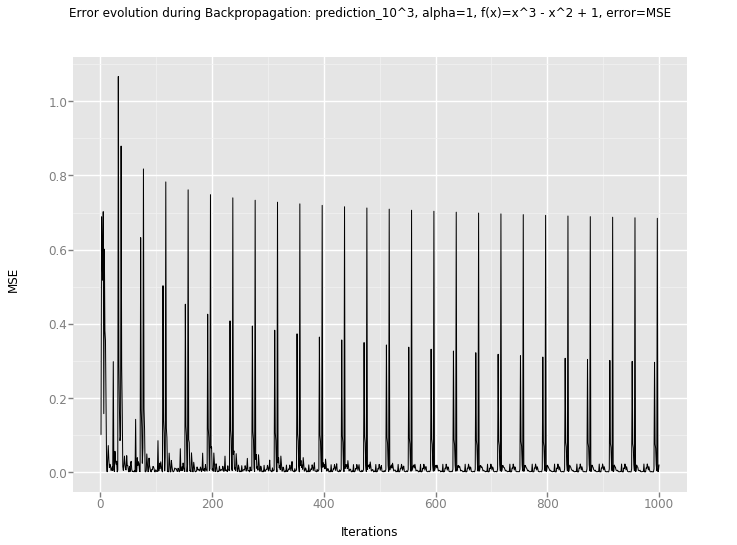

<ggplot: (294945898)>

In [10]:
k = 'prediction_10^3'
%matplotlib inline
ggplot(errors[k], aes(x='Iterations', y='MSE')) + \
    geom_line(size=1) + ggtitle("Error evolution during Backpropagation: %s, alpha=%s, f(x)=x^3 - x^2 + 1, error=MSE" % (k, best_alpha.get(2)))

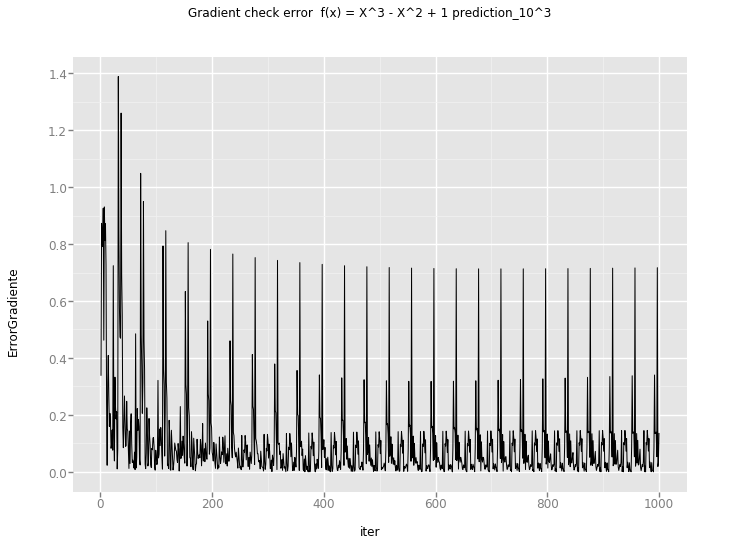

<ggplot: (294969622)>

In [11]:
%matplotlib inline
ggplot(gcheck[k], aes(x='iter', y='ErrorGradiente')) + \
    geom_line(size=1) + ylab("ErrorGradiente") + ggtitle("Gradient check error  f(x) = X^3 - X^2 + 1 %s" % k)

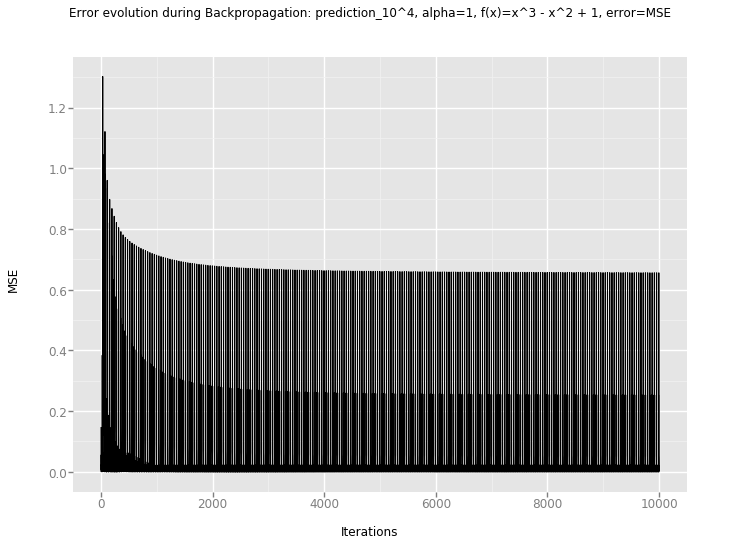

<ggplot: (294666893)>

In [12]:
k = 'prediction_10^4'
%matplotlib inline
ggplot(errors[k], aes(x='Iterations', y='MSE')) + \
    geom_line(size=1) + ggtitle("Error evolution during Backpropagation: %s, alpha=%s, f(x)=x^3 - x^2 + 1, error=MSE" % (k, best_alpha.get(2)))

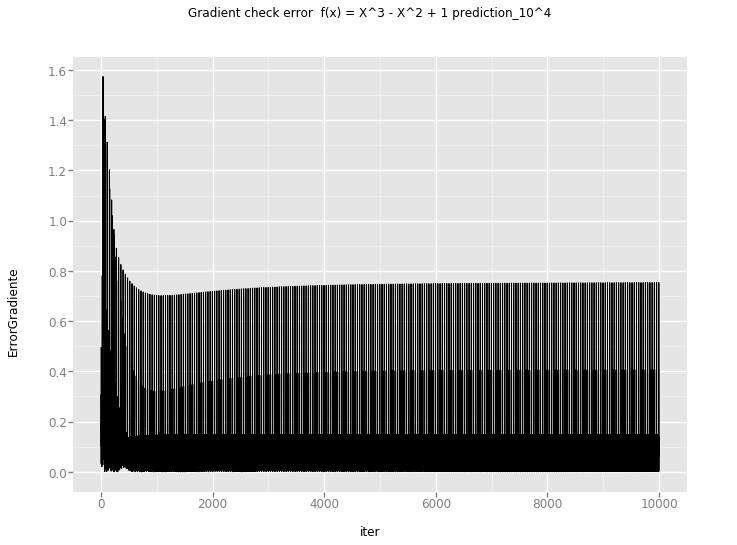

<ggplot: (287086070)>

In [13]:
%matplotlib inline
ggplot(gcheck[k], aes(x='iter', y='ErrorGradiente')) + \
    geom_line(size=1) + ylab("ErrorGradiente") + ggtitle("Gradient check error  f(x) = X^3 - X^2 + 1 %s" % k)

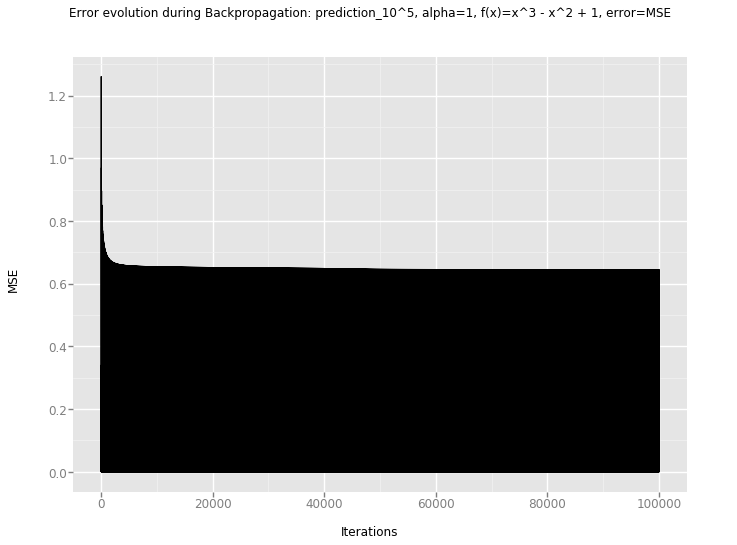

<ggplot: (-9223372036557912281)>

In [14]:
k = 'prediction_10^5'
%matplotlib inline
ggplot(errors[k], aes(x='Iterations', y='MSE')) + \
    geom_line(size=1) + ggtitle("Error evolution during Backpropagation: %s, alpha=%s, f(x)=x^3 - x^2 + 1, error=MSE" % (k, best_alpha.get(2)))

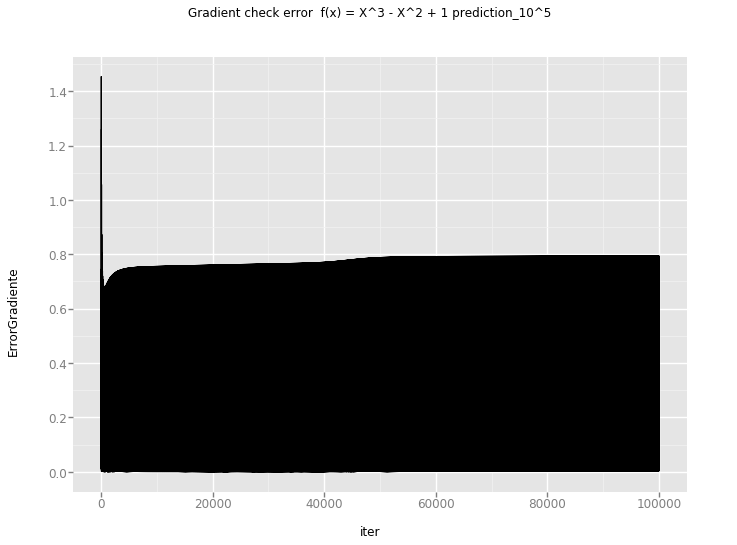

<ggplot: (-9223372036559507964)>

In [15]:
%matplotlib inline
ggplot(gcheck[k], aes(x='iter', y='ErrorGradiente')) + \
    geom_line(size=1) + ylab("ErrorGradiente") + ggtitle("Gradient check error  f(x) = X^3 - X^2 + 1 %s" % k)

## g(x, y) = 1 - X^2 - Y^2 
## Iterations: 10^2, 10^3, 10^4, 10^5

In [16]:
from pylab import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/Madlink/miniconda2/envs/aa2018/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['info', 'linalg', 'power', 'random', 'fft']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [17]:
def g(w):
    #  w[0] = x
    #  w[1] = y
    return np.array([1 - w[0]**2 - w[1]**2])
func = g
nin = 2
nout = 1

### Calculo el mejor alpha para cada iteracion

In [18]:
points = generate_points(number=40, func=func, point_size=nin)
best_alpha = get_best_alpha(nin=nin, nout=nout, func=func, points=points)
print(best_alpha)

{2: 0.1, 3: 1, 4: 1, 5: 0.8}


In [19]:
def obtain_3dchart_axes(values):
    X = []
    Y = []
    Z = []
    for x, y in values["x"].values:
        X.append(x)
        Y.append(y)
    for z in values["y"].values:
        Z.append(z[0])
    Zp = []
    for z in values["prediction"].values:
        Zp.append(z[0])

    xi = linspace(min(X), max(X))
    yi = linspace(min(Y), max(Y))
    zi = griddata(X, Y, Z, xi, yi, interp="linear")
    zi_p = griddata(X, Y, Zp, xi, yi, interp="linear")
    return xi, yi, zi, zi_p


### Iteracion 10^2 - Prediccion, Grafico de funcion 2D y 3D

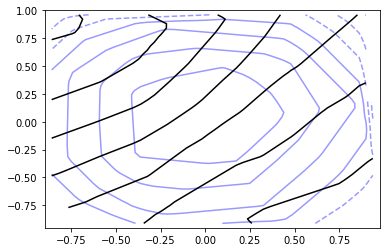

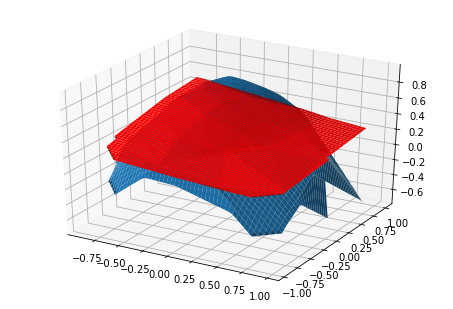

In [20]:
values, error, gcheck = predictions(10**2, best_alpha.get(2), func, nin=2, nout=1, nhidden=10, gcheck=True, points=points)

xi, yi, zi, zi_p = obtain_3dchart_axes(values)
contour(xi, yi, zi, alpha=0.4, colors="b")
contour(xi, yi, zi_p, colors="black")
fig = figure()
ax = Axes3D(fig)
xim, yim = meshgrid(xi, yi)
ax.plot_surface(xim, yim, zi)
ax.plot_surface(xim, yim, zi_p, color="red")

### Iteracion 10^2 - Error  en cada iteracion

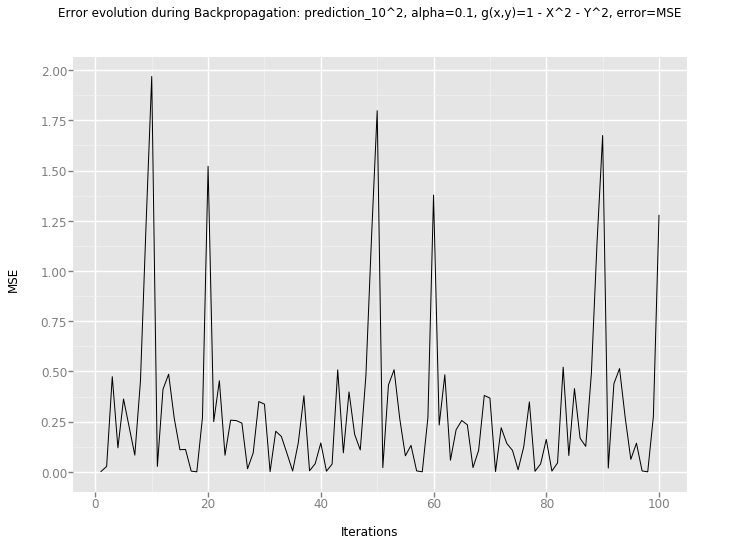

<ggplot: (-9223372036538513071)>

In [21]:
k = 'prediction_10^2'
%matplotlib inline
ggplot(error, aes(x='Iterations', y='MSE')) + \
    geom_line(size=1) + ggtitle("Error evolution during Backpropagation: %s, alpha=%s, g(x,y)=1 - X^2 - Y^2, error=MSE" % (k,best_alpha.get(2)))

### Iteracion 10^2 - gradient check

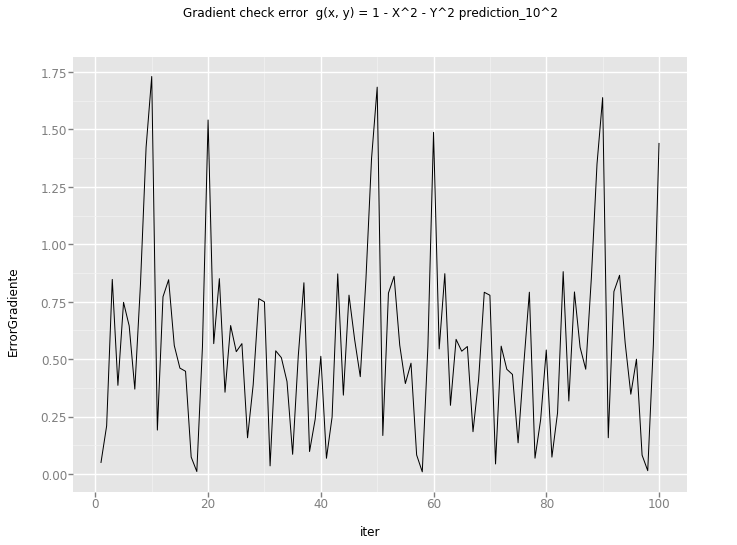

<ggplot: (308980691)>

In [22]:
%matplotlib inline
ggplot(gcheck, aes(x='iter', y='ErrorGradiente')) + \
    geom_line(size=1) + ylab("ErrorGradiente") + ggtitle("Gradient check error  g(x, y) = 1 - X^2 - Y^2 %s" % k)

### Iteracion 10^3 - Prediccion, Grafico de funcion 2D y 3D

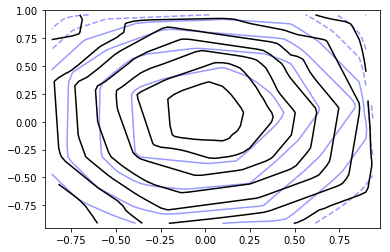

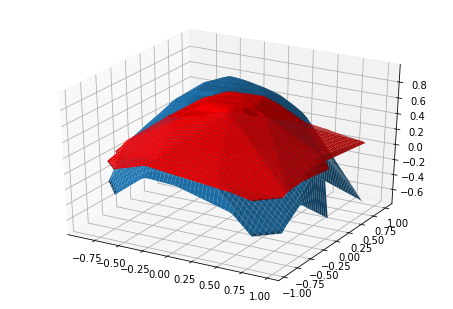

In [23]:
values, error, gcheck = predictions(10**3, best_alpha.get(3), func, nin=2, nout=1, nhidden=11, gcheck=True, points=points)

xi, yi, zi, zi_p = obtain_3dchart_axes(values)
contour(xi, yi, zi, alpha=0.4, colors="b")
contour(xi, yi, zi_p, colors="black")
fig = figure()
ax = Axes3D(fig)
xim, yim = meshgrid(xi, yi)
ax.plot_surface(xim, yim, zi)
ax.plot_surface(xim, yim, zi_p, color="red")

### Iteracion 10^3 - Error  en cada iteracion

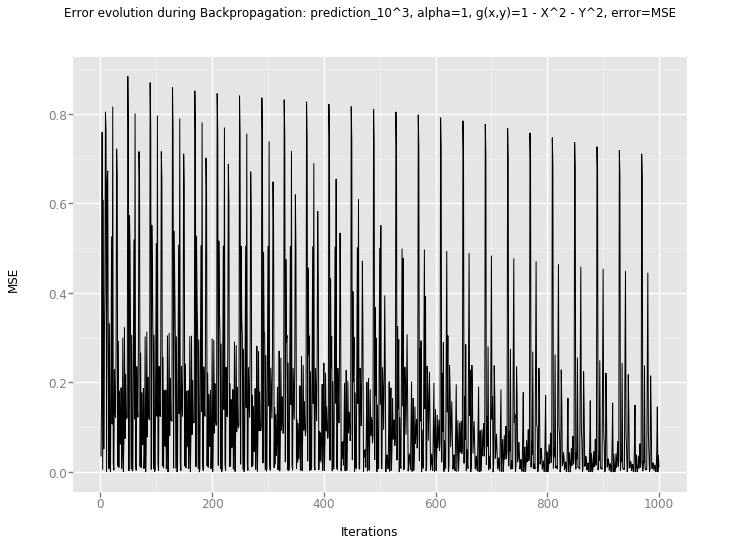

<ggplot: (-9223372036545795247)>

In [24]:
k = 'prediction_10^3'
%matplotlib inline
ggplot(error, aes(x='Iterations', y='MSE')) + \
    geom_line(size=1) + ggtitle("Error evolution during Backpropagation: %s, alpha=%s, g(x,y)=1 - X^2 - Y^2, error=MSE" % (k,best_alpha.get(3)))

### Iteracion 10^3 - gradient check

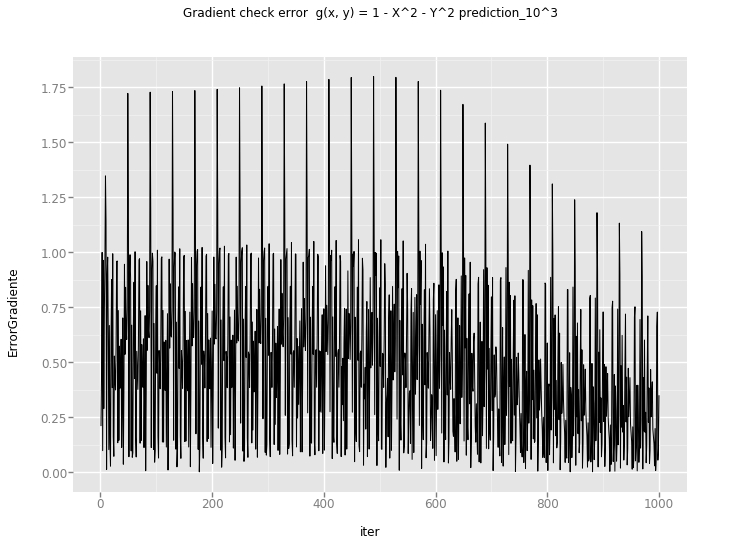

<ggplot: (308969834)>

In [25]:
%matplotlib inline
ggplot(gcheck, aes(x='iter', y='ErrorGradiente')) + \
    geom_line(size=1) + ylab("ErrorGradiente") + ggtitle("Gradient check error  g(x, y) = 1 - X^2 - Y^2 %s" % k)

### Iteracion 10^4 - Prediccion, Grafico de funcion 2D y 3D

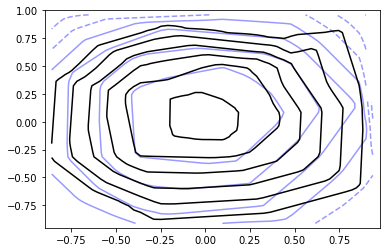

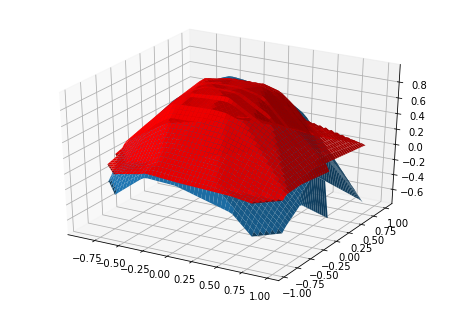

In [26]:
values, error, gcheck = predictions(10**4, best_alpha.get(4), func, nin=2, nout=1, nhidden=10, gcheck=True, points=points)

xi, yi, zi, zi_p = obtain_3dchart_axes(values)
contour(xi, yi, zi, alpha=0.4, colors="b")
contour(xi, yi, zi_p, colors="black")
fig = figure()
ax = Axes3D(fig)
xim, yim = meshgrid(xi, yi)
ax.plot_surface(xim, yim, zi)
ax.plot_surface(xim, yim, zi_p, color="red")

### Iteracion 10^4 - Error  en cada iteracion

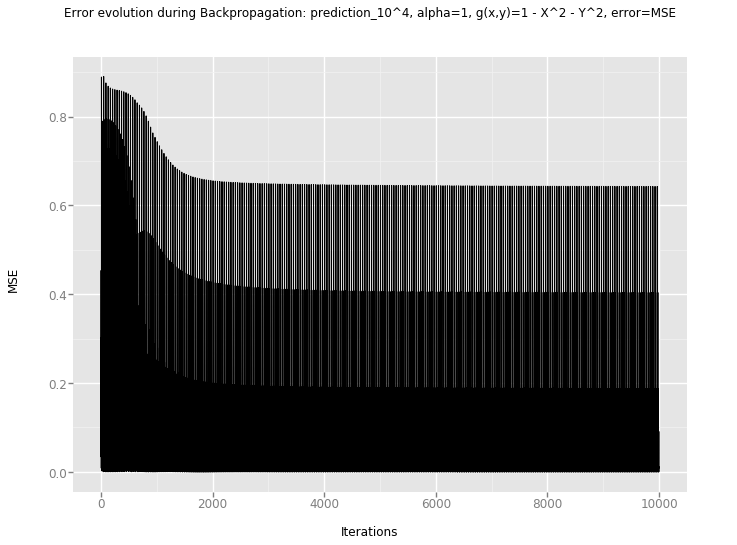

<ggplot: (309254113)>

In [27]:
k = 'prediction_10^4'
%matplotlib inline
ggplot(error, aes(x='Iterations', y='MSE')) + \
    geom_line(size=1) + ggtitle("Error evolution during Backpropagation: %s, alpha=%s, g(x,y)=1 - X^2 - Y^2, error=MSE" % (k,best_alpha.get(4)))

### Iteracion 10^4 - gradient check

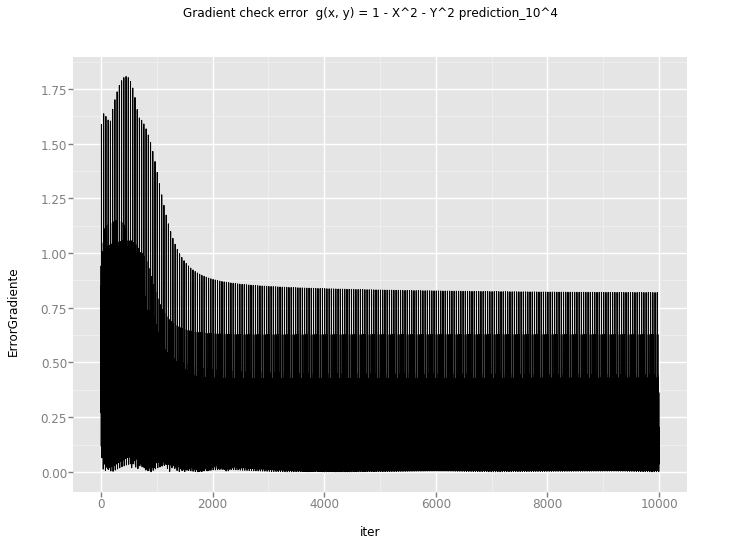

<ggplot: (309254092)>

In [28]:
%matplotlib inline
ggplot(gcheck, aes(x='iter', y='ErrorGradiente')) + \
    geom_line(size=1) + ylab("ErrorGradiente") + ggtitle("Gradient check error  g(x, y) = 1 - X^2 - Y^2 %s" % k)

### Iteracion 10^5 - Prediccion, Grafico de funcion 2D y 3D

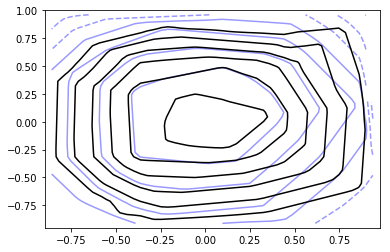

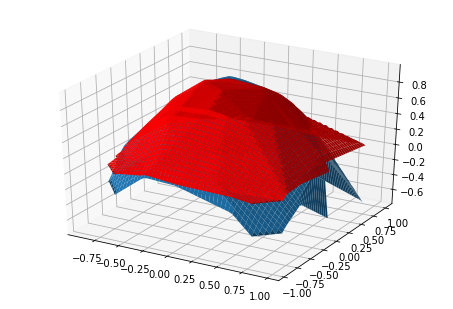

In [29]:
values, error, gcheck = predictions(10**5, best_alpha.get(5), func, nin=2, nout=1, nhidden=10, gcheck=True, points=points)

xi, yi, zi, zi_p = obtain_3dchart_axes(values)
contour(xi, yi, zi, alpha=0.4, colors="b")
contour(xi, yi, zi_p, colors="black")
fig = figure()
ax = Axes3D(fig)
xim, yim = meshgrid(xi, yi)
ax.plot_surface(xim, yim, zi)
ax.plot_surface(xim, yim, zi_p, color="red")

### Iteracion 10^5 - Error  en cada iteracion

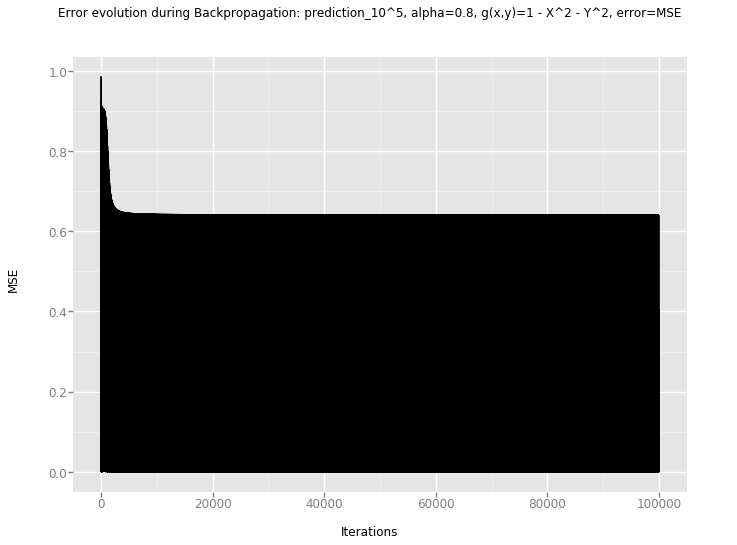

<ggplot: (316984107)>

In [30]:
k = 'prediction_10^5'
%matplotlib inline
ggplot(error, aes(x='Iterations', y='MSE')) + \
    geom_line(size=1) + ggtitle("Error evolution during Backpropagation: %s, alpha=%s, g(x,y)=1 - X^2 - Y^2, error=MSE" % (k,best_alpha.get(5)))

### Iteracion 10^5 - gradient check

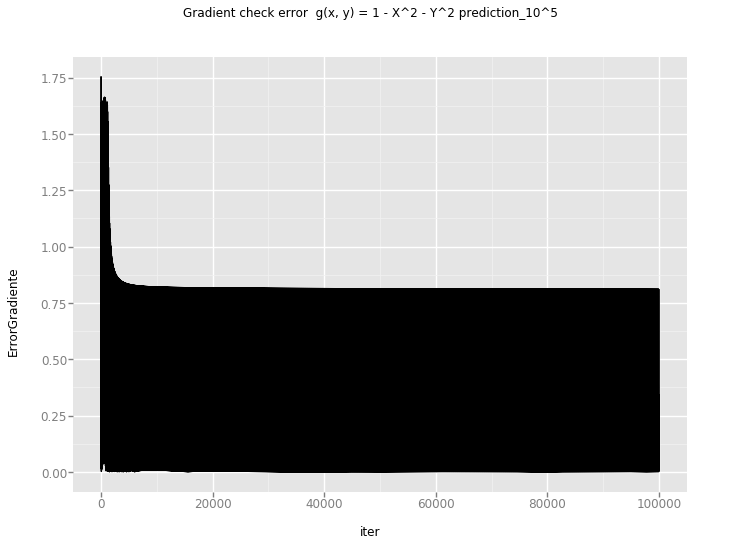

<ggplot: (316984219)>

In [31]:
%matplotlib inline
ggplot(gcheck, aes(x='iter', y='ErrorGradiente')) + \
    geom_line(size=1) + ylab("ErrorGradiente") + ggtitle("Gradient check error  g(x, y) = 1 - X^2 - Y^2 %s" % k)

## h(x, y) = x + y 
## Iterations: 10^2, 10^3, 10^4, 10^5

In [32]:
from pylab import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/Madlink/miniconda2/envs/aa2018/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['info', 'linalg', 'power', 'random', 'fft']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [33]:
def h(w):
    #  w[0] = x
    #  w[1] = y
    return np.array([w[0]+w[1]])
func = g
nin=2
nout=1

### Calculo el mejor alpha para cada iteracion

In [34]:
points = generate_points(number=40, func=func, point_size=nin)
best_alpha = get_best_alpha(nin=nin, nout=nout, func=func, points=points)
print(best_alpha)

{2: 0.5, 3: 1, 4: 0.8, 5: 1}


In [35]:
def obtain_3dchart_axes(values):
    X = []
    Y = []
    Z = []
    for x, y in values["x"].values:
        X.append(x)
        Y.append(y)
    for z in values["y"].values:
        Z.append(z[0])
    Zp = []
    for z in values["prediction"].values:
        Zp.append(z[0])

    xi = linspace(min(X), max(X))
    yi = linspace(min(Y), max(Y))
    zi = griddata(X, Y, Z, xi, yi, interp="linear")
    zi_p = griddata(X, Y, Zp, xi, yi, interp="linear")
    return xi, yi, zi, zi_p


### Iteracion 10^2 - Prediccion, Grafico de funcion 2D y 3D

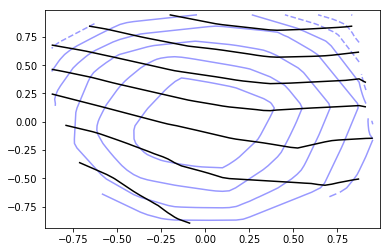

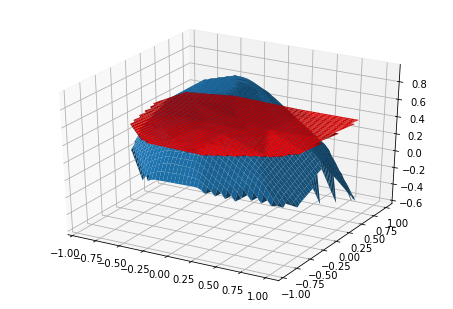

In [36]:
values, error, gcheck = predictions(10**2, best_alpha.get(2), func, nin=2, nout=1, nhidden=11, gcheck=True)

xi, yi, zi, zi_p = obtain_3dchart_axes(values)
contour(xi, yi, zi, alpha=0.4, colors="b")
contour(xi, yi, zi_p, colors="black")
fig = figure()
ax = Axes3D(fig)
xim, yim = meshgrid(xi, yi)
ax.plot_surface(xim, yim, zi)
ax.plot_surface(xim, yim, zi_p, color="red")

### Iteracion 10^2 - Error  en cada iteracion

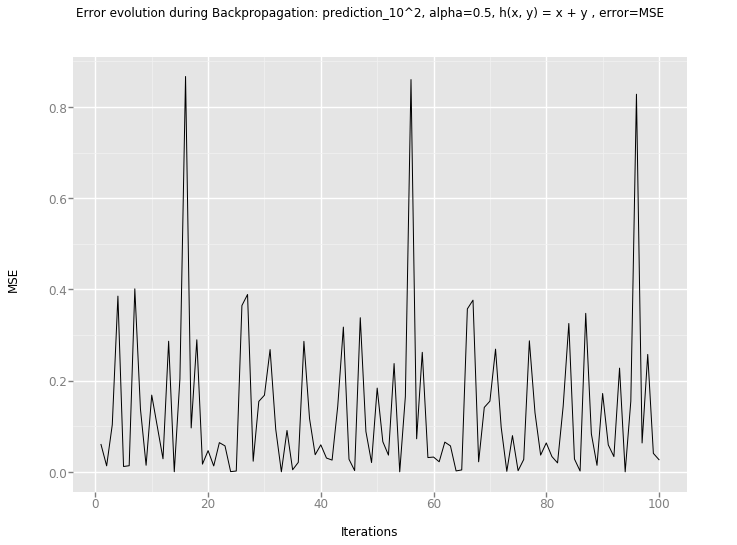

<ggplot: (319670848)>

In [37]:
k = 'prediction_10^2'
%matplotlib inline
ggplot(error, aes(x='Iterations', y='MSE')) + \
    geom_line(size=1) + ggtitle("Error evolution during Backpropagation: %s, alpha=%s, h(x, y) = x + y , error=MSE" % (k,best_alpha.get(2)))

### Iteracion 10^2 - gradient check

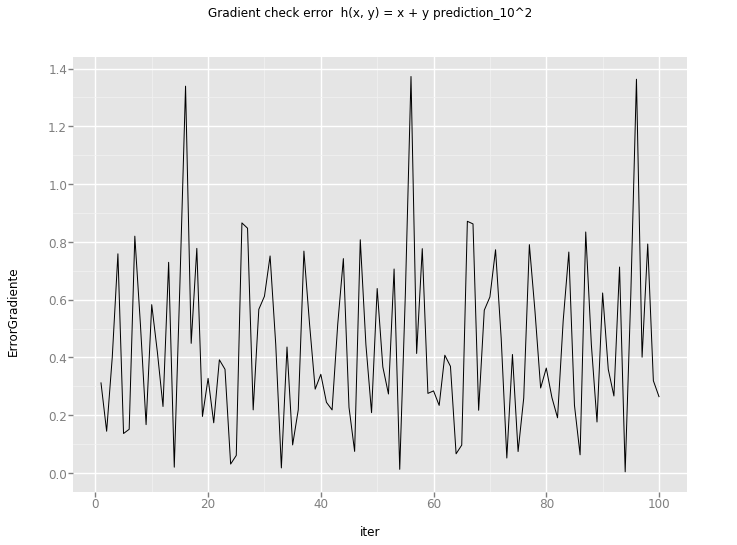

<ggplot: (-9223372036537268010)>

In [38]:
%matplotlib inline
ggplot(gcheck, aes(x='iter', y='ErrorGradiente')) + \
    geom_line(size=1) + ylab("ErrorGradiente") + ggtitle("Gradient check error  h(x, y) = x + y %s" % k)

### Iteracion 10^3 - Prediccion, Grafico de funcion 2D y 3D

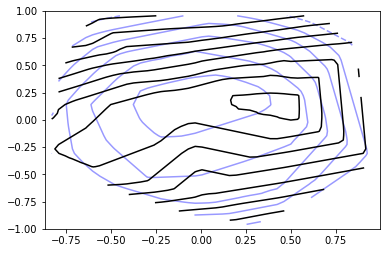

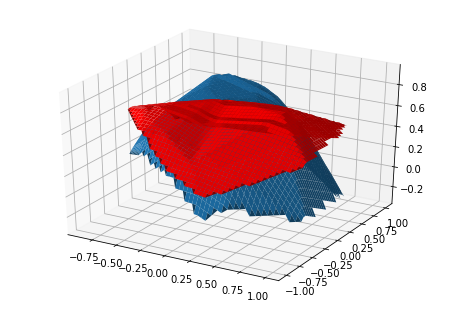

In [39]:
values, error, gcheck = predictions(10**3, best_alpha.get(3), func, nin=2, nout=1, nhidden=11, gcheck=True)

xi, yi, zi, zi_p = obtain_3dchart_axes(values)
contour(xi, yi, zi, alpha=0.4, colors="b")
contour(xi, yi, zi_p, colors="black")
fig = figure()
ax = Axes3D(fig)
xim, yim = meshgrid(xi, yi)
ax.plot_surface(xim, yim, zi)
ax.plot_surface(xim, yim, zi_p, color="red")

### Iteracion 10^3 - Error  en cada iteracion

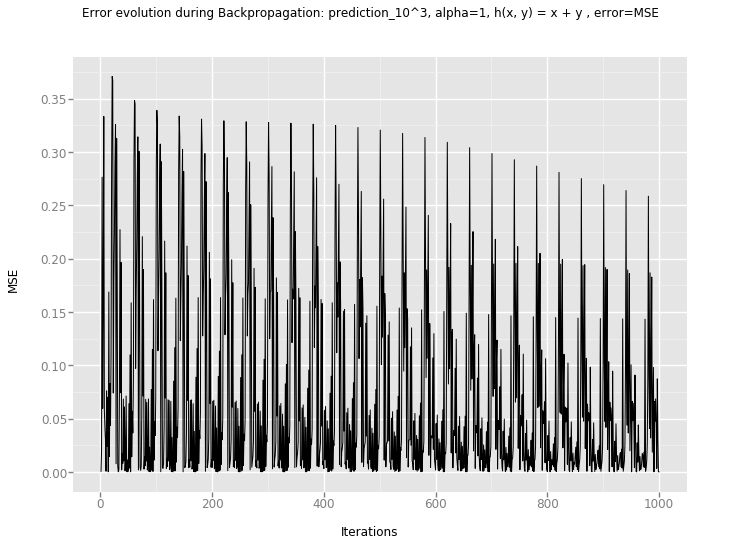

<ggplot: (-9223372036534885169)>

In [40]:
k = 'prediction_10^3'
%matplotlib inline
ggplot(error, aes(x='Iterations', y='MSE')) + \
    geom_line(size=1) + ggtitle("Error evolution during Backpropagation: %s, alpha=%s, h(x, y) = x + y , error=MSE" % (k,best_alpha.get(3)))

### Iteracion 10^3 - gradient check

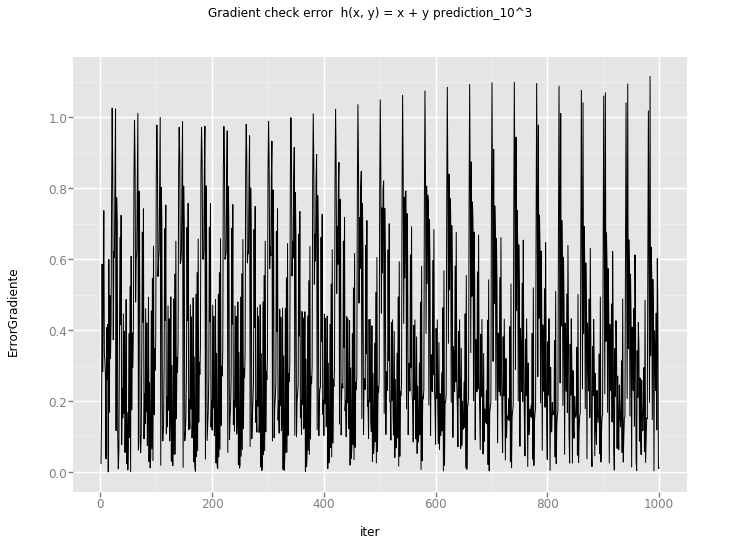

<ggplot: (-9223372036537268101)>

In [41]:
%matplotlib inline
ggplot(gcheck, aes(x='iter', y='ErrorGradiente')) + \
    geom_line(size=1) + ylab("ErrorGradiente") + ggtitle("Gradient check error  h(x, y) = x + y %s" % k)

### Iteracion 10^4 - Prediccion, Grafico de funcion 2D y 3D

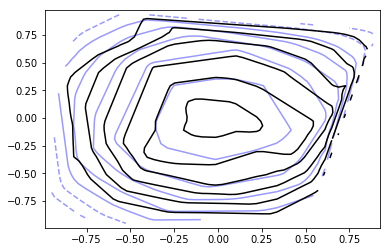

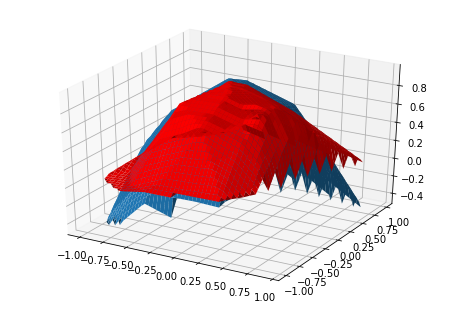

In [42]:
values, error, gcheck = predictions(10**4, best_alpha.get(4), func, nin=2, nout=1, nhidden=11, gcheck=True)

xi, yi, zi, zi_p = obtain_3dchart_axes(values)
contour(xi, yi, zi, alpha=0.4, colors="b")
contour(xi, yi, zi_p, colors="black")
fig = figure()
ax = Axes3D(fig)
xim, yim = meshgrid(xi, yi)
ax.plot_surface(xim, yim, zi)
ax.plot_surface(xim, yim, zi_p, color="red")

### Iteracion 10^4 - Error  en cada iteracion

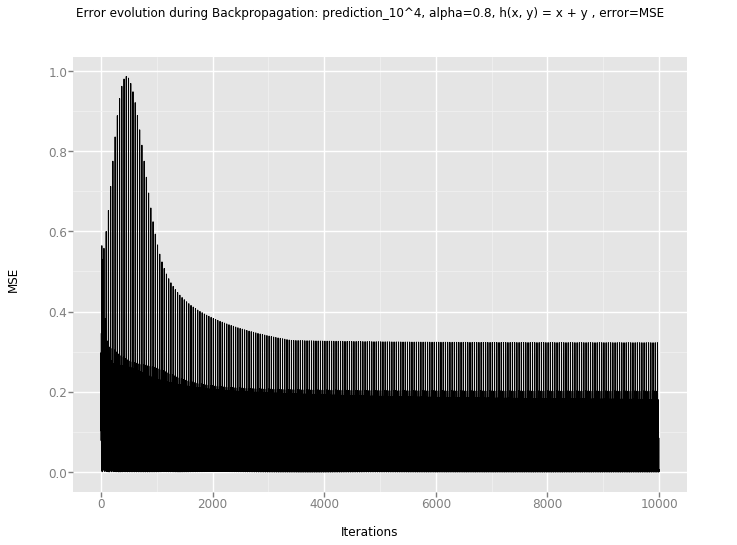

<ggplot: (319802695)>

In [43]:
k = 'prediction_10^4'
%matplotlib inline
ggplot(error, aes(x='Iterations', y='MSE')) + \
    geom_line(size=1) + ggtitle("Error evolution during Backpropagation: %s, alpha=%s, h(x, y) = x + y , error=MSE" % (k,best_alpha.get(4)))

### Iteracion 10^4 - gradient check

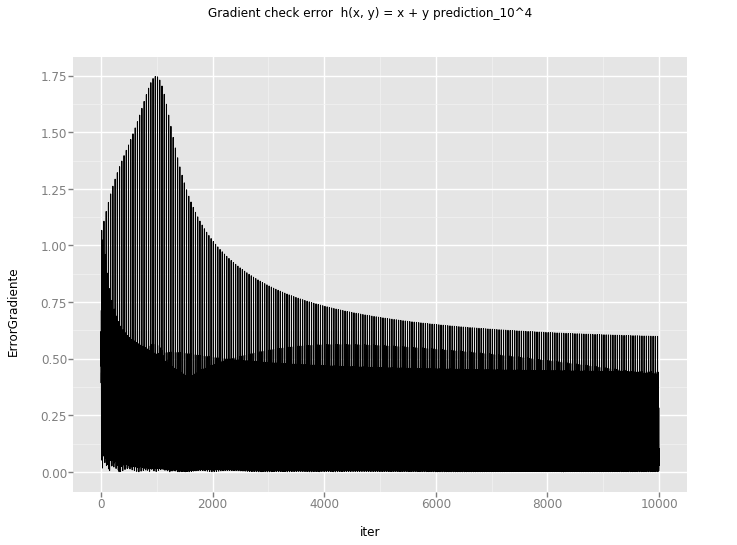

<ggplot: (-9223372036541736181)>

In [44]:
%matplotlib inline
ggplot(gcheck, aes(x='iter', y='ErrorGradiente')) + \
    geom_line(size=1) + ylab("ErrorGradiente") + ggtitle("Gradient check error  h(x, y) = x + y %s" % k)

### Iteracion 10^5 - Prediccion, Grafico de funcion 2D y 3D

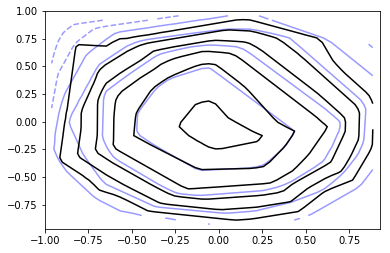

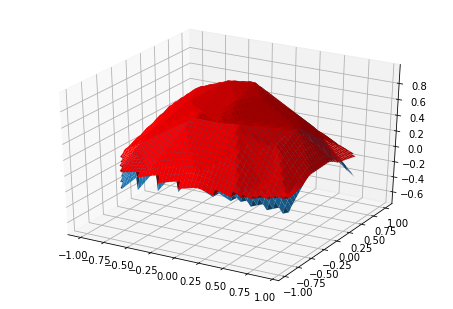

In [45]:
values, error, gcheck = predictions(10**5, best_alpha.get(5), func, nin=2, nout=1, nhidden=11, gcheck=True)

xi, yi, zi, zi_p = obtain_3dchart_axes(values)
contour(xi, yi, zi, alpha=0.4, colors="b")
contour(xi, yi, zi_p, colors="black")
fig = figure()
ax = Axes3D(fig)
xim, yim = meshgrid(xi, yi)
ax.plot_surface(xim, yim, zi)
ax.plot_surface(xim, yim, zi_p, color="red")

### Iteracion 10^5 - Error  en cada iteracion

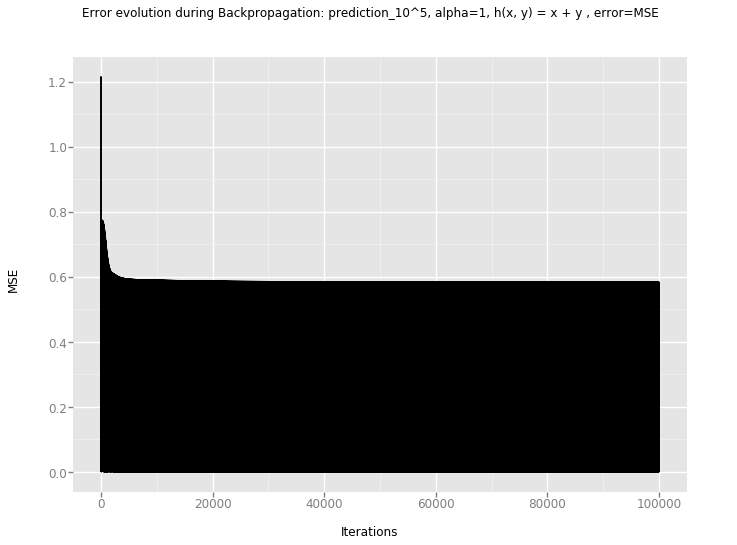

<ggplot: (319752631)>

In [46]:
k = 'prediction_10^5'
%matplotlib inline
ggplot(error, aes(x='Iterations', y='MSE')) + \
    geom_line(size=1) + ggtitle("Error evolution during Backpropagation: %s, alpha=%s, h(x, y) = x + y , error=MSE" % (k,best_alpha.get(5)))

### Iteracion 10^5 - gradient check

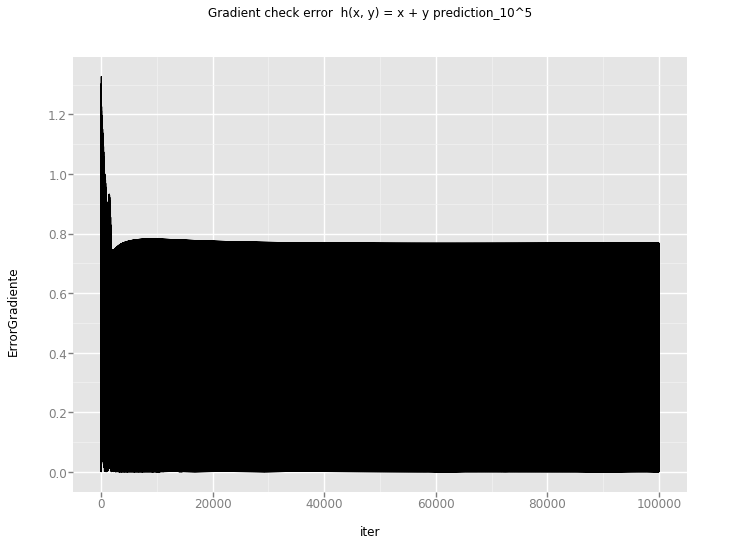

<ggplot: (320909523)>

In [47]:
%matplotlib inline
ggplot(gcheck, aes(x='iter', y='ErrorGradiente')) + \
    geom_line(size=1) + ylab("ErrorGradiente") + ggtitle("Gradient check error  h(x, y) = x + y %s" % k)

## Resultados

Como se puede observar en las graficas de las funciones en cada iteracion, cuanto mayor es el numero, mejor se aproxima la funcion objetivo.

Observando el grafico del error tambien se puede ver que llega un momento en que el error deja de reducirse. Debido a que con el set de datos que se tiene no se puede seguir mejorando

Agregamos el checkeo con gradiente para lo cual calculamos la funcion de costo para cada caso de prueba +/- epsilon y buscamos la diferencia. Luego comparamos con los deltas calculados por el descenso por gradiente y vemos que el error se reduce hasta cierto punto despues del cual se mantiene igual. 

De todas formas la diferencia es baja lo cual nos dice que nuestra implementacion esta haciendo lo esperado.